In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#  Configuración visual
sns.set(style="whitegrid")
sns.set_context('notebook')

df = pd.read_csv('C:/Users/Juan Alvaro/OneDrive - up.edu.mx/Research/Nivelación fiscal/participaciones-federales.csv')
df.head()

,Estado,year,gdp,gdp_mp,gdp_smp,gov,deflator,pop,gov_real,govpc,gdppc,gdppc_smp
0,Aguascalientes,2005,185650.542,0.0,185650.542,3290.445,54.395626,1103237,6049.098476,5483.045326,168278.023670,168278.023670
1,Aguascalientes,2006,200318.265,0.0,200318.265,3982.599,56.668479,1121072,7027.891172,6268.902597,178684.567093,178684.567093
2,Aguascalientes,2007,219091.899,0.0,219091.899,4059.739,59.215494,1119581,6855.872907,6123.605980,195690.976356,195690.976356
3,Aguascalientes,2008,218472.947,0.0,218472.947,4935.054,61.354991,1144463,8043.443500,7028.137651,190895.596450,190895.596450
4,Aguascalientes,2009,201960.396,0.0,201960.396,4266.427,66.168454,1169939,6447.826366,5511.250045,172624.723169,172624.723169


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Estado     608 non-null    object 
 1   year       608 non-null    int64  
 2   gdp        608 non-null    float64
 3   gdp_mp     608 non-null    float64
 4   gdp_smp    608 non-null    float64
 5   gov        608 non-null    float64
 6   deflator   608 non-null    float64
 7   pop        608 non-null    int64  
 8   gov_real   608 non-null    float64
 9   govpc      608 non-null    float64
 10  gdppc      608 non-null    float64
 11  gdppc_smp  608 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 57.1+ KB


In [118]:
df.describe()

,year,gdp,gdp_mp,gdp_smp,gov,deflator,pop,gov_real,govpc,gdppc,gdppc_smp
count,608.000000,6.080000e+02,608.000000,6.080000e+02,608.000000,608.000000,6.080000e+02,608.000000,608.000000,6.080000e+02,608.000000
mean,2014.000000,6.874710e+05,27047.800156,6.604232e+05,19829.654789,84.821787,3.699950e+06,22465.460960,6214.007934,2.004810e+05,176819.469881
std,5.481735,6.618948e+05,104055.939265,6.698263e+05,20183.555358,23.061045,3.086042e+06,19693.976187,1404.026009,1.359609e+05,69488.582611
min,2005.000000,1.076313e+05,0.000000,1.076313e+05,1957.939000,38.944824,5.535460e+05,3568.852344,3369.201271,6.037111e+04,59181.530912
25%,2009.000000,2.889278e+05,0.000000,2.663433e+05,7884.424000,66.185003,1.687012e+06,9576.096793,5368.061610,1.298116e+05,127066.717197
50%,2014.000000,4.899854e+05,0.000000,4.102588e+05,13296.495388,80.591683,2.860364e+06,17524.271211,5983.140087,1.735797e+05,163058.179602
75%,2019.000000,7.982156e+05,152.362000,7.905517e+05,23669.172933,103.494772,4.581578e+06,25620.711135,6721.980418,2.248187e+05,212697.620700
max,2023.000000,3.806083e+06,837937.252000,3.806083e+06,150707.116613,134.488942,1.761709e+07,118797.055917,15016.864819,1.275036e+06,408611.325695


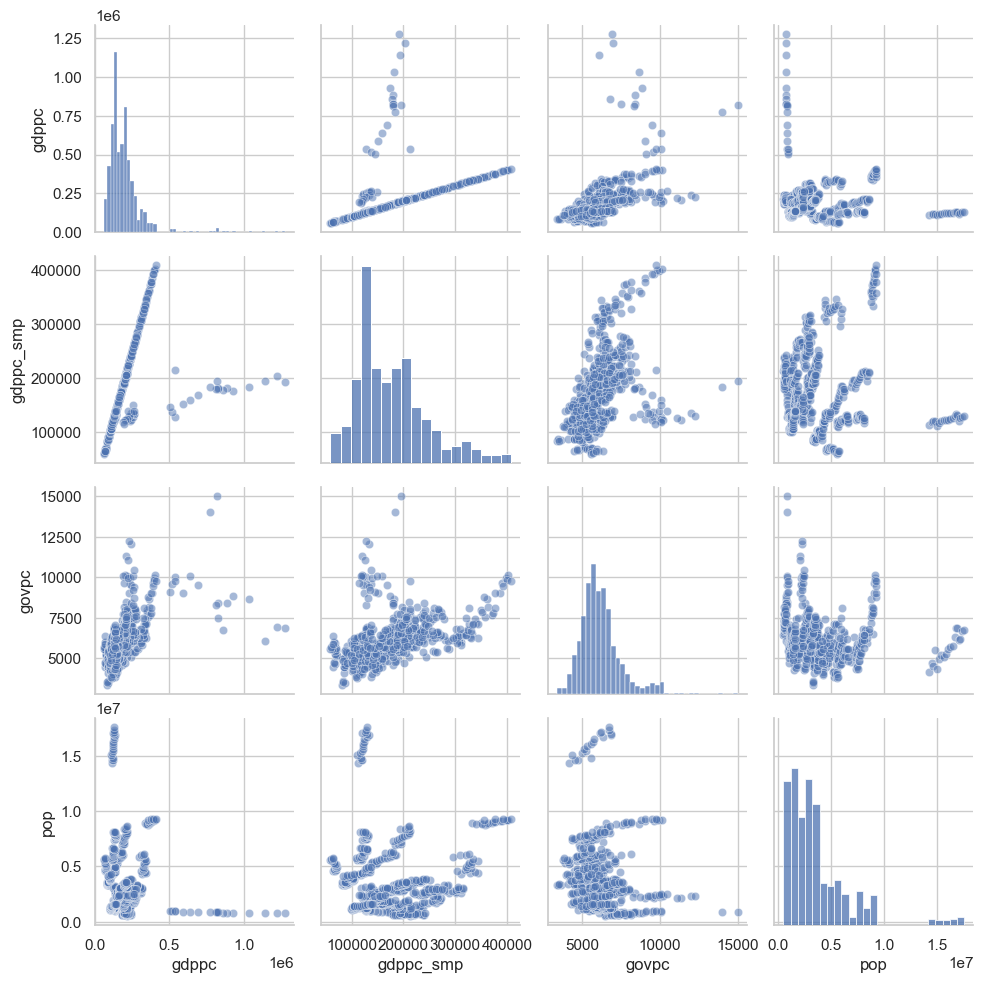

In [119]:
# Diagnóstico
sns.pairplot(data=df, vars=['gdppc', 'gdppc_smp', 'govpc', 'pop'], diag_kind='hist', kind='scatter', plot_kws={'alpha':0.5})
plt.show()

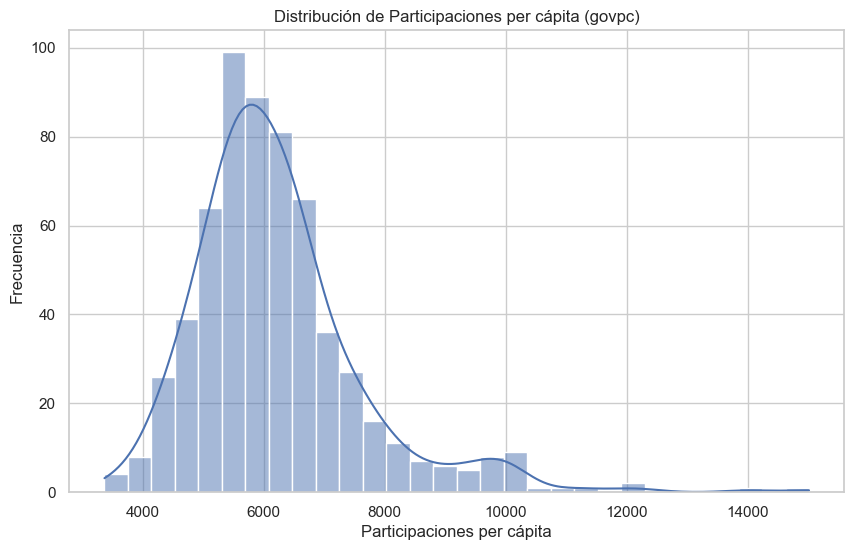

In [120]:
# Distribución general de govpc (participaciones per cápita)
plt.figure(figsize=(10, 6))
sns.histplot(df['govpc'], bins=30, kde=True)
plt.title('Distribución de Participaciones per cápita (govpc)')
plt.xlabel('Participaciones per cápita')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

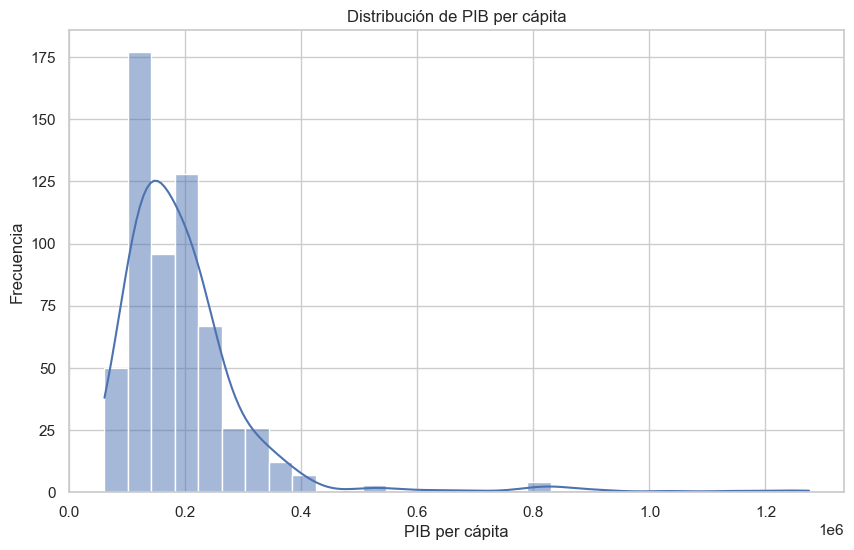

In [121]:
# Distribución general de govpc (participaciones per cápita)
plt.figure(figsize=(10, 6))
sns.histplot(df['gdppc'], bins=30, kde=True)
plt.title('Distribución de PIB per cápita')
plt.xlabel('PIB per cápita')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

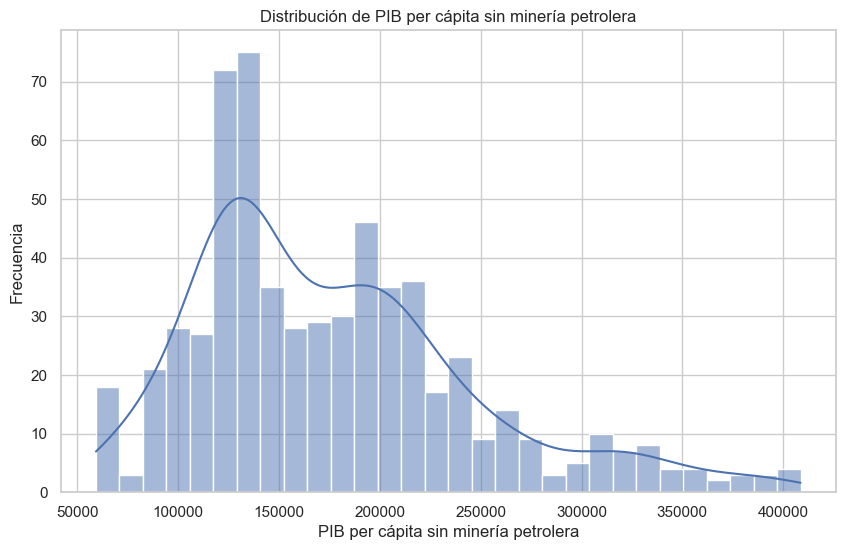

In [122]:
# Distribución general de govpc (participaciones per cápita)
plt.figure(figsize=(10, 6))
sns.histplot(df['gdppc_smp'], bins=30, kde=True)
plt.title('Distribución de PIB per cápita sin minería petrolera')
plt.xlabel('PIB per cápita sin minería petrolera')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

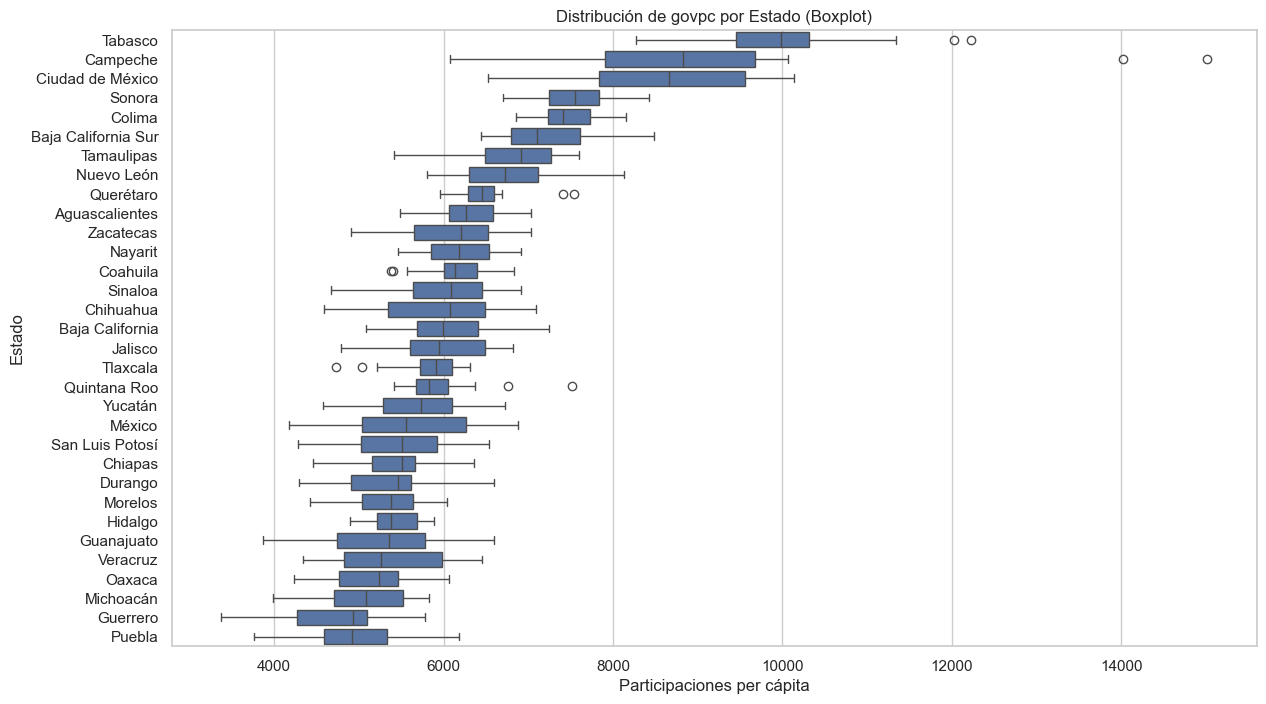

In [123]:
# Boxplot de govpc por Estado para detectar thresholds visuales
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='govpc', y='Estado', orient='h', order=df.groupby('Estado').median().sort_values('govpc', ascending=False).index)
plt.title('Distribución de govpc por Estado (Boxplot)')
plt.xlabel('Participaciones per cápita')
plt.ylabel('Estado')
plt.show()

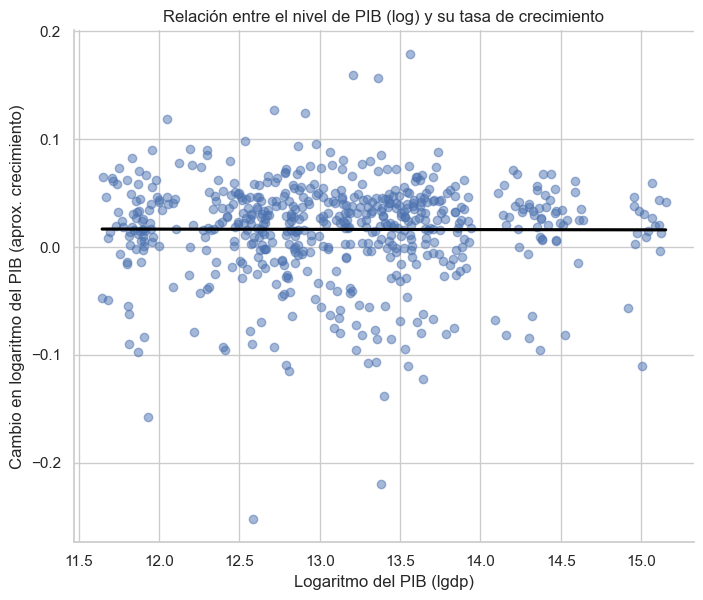

In [124]:
# Supuestos de Solow

df['lgdp'] = np.log(df['gdp'])

# Δ log(gdp) ≈ tasa de crecimiento cuando los cambios son pequeños
df['g_logdiff'] = df.groupby('Estado')['lgdp'].diff()

sns.lmplot(
    data=df.dropna(subset=['lgdp', 'g_logdiff']),
    x='lgdp',
    y='g_logdiff',
    scatter_kws={'alpha': 0.5},  
    height=6,
    aspect=1.2,
    line_kws={'color': 'black'},
    ci=None
)

plt.title('Relación entre el nivel de PIB (log) y su tasa de crecimiento') 
plt.xlabel('Logaritmo del PIB (lgdp)')
plt.ylabel('Cambio en logaritmo del PIB (aprox. crecimiento)')
plt.show()


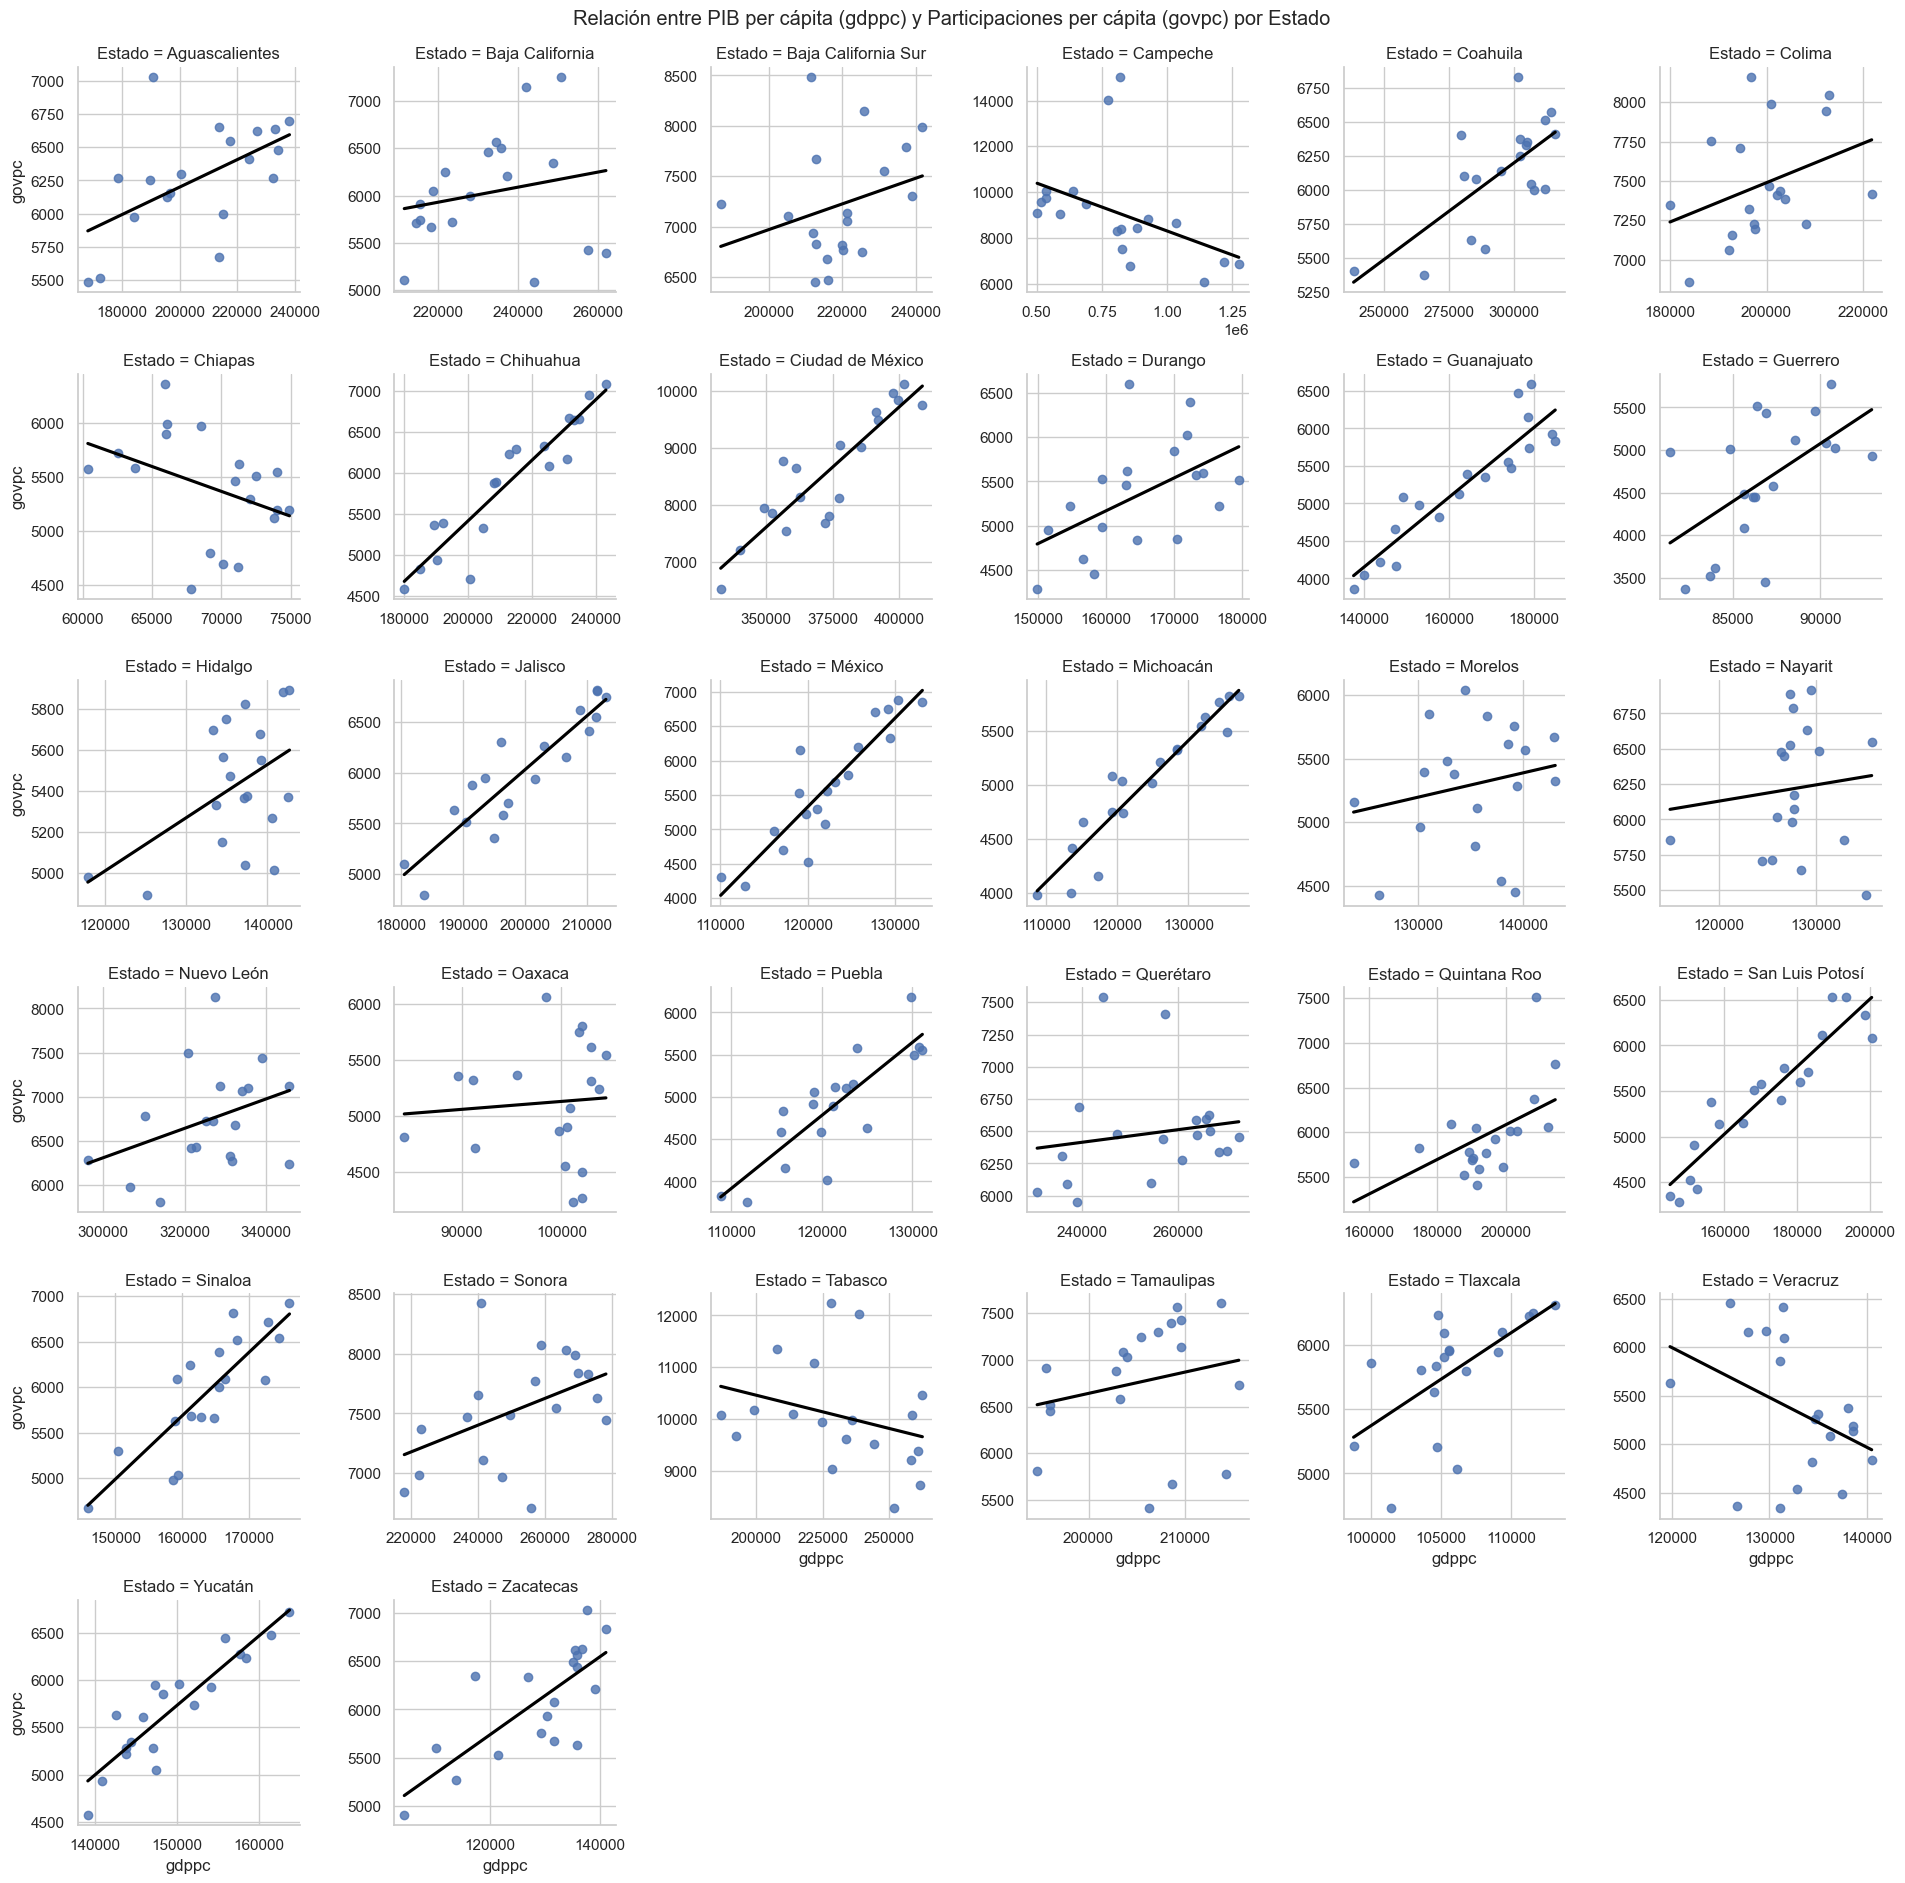

In [125]:
# Relación entre govpc y gdppc por Estado (relplot)
sns.lmplot(data=df, x='gdppc', y='govpc', col='Estado', col_wrap=6, height=3.2,   
            line_kws={'color': 'black'}, ci=None, facet_kws = {'sharex':False, 'sharey':False})
plt.subplots_adjust(top=0.95)
plt.suptitle('Relación entre PIB per cápita (gdppc) y Participaciones per cápita (govpc) por Estado')
plt.show()

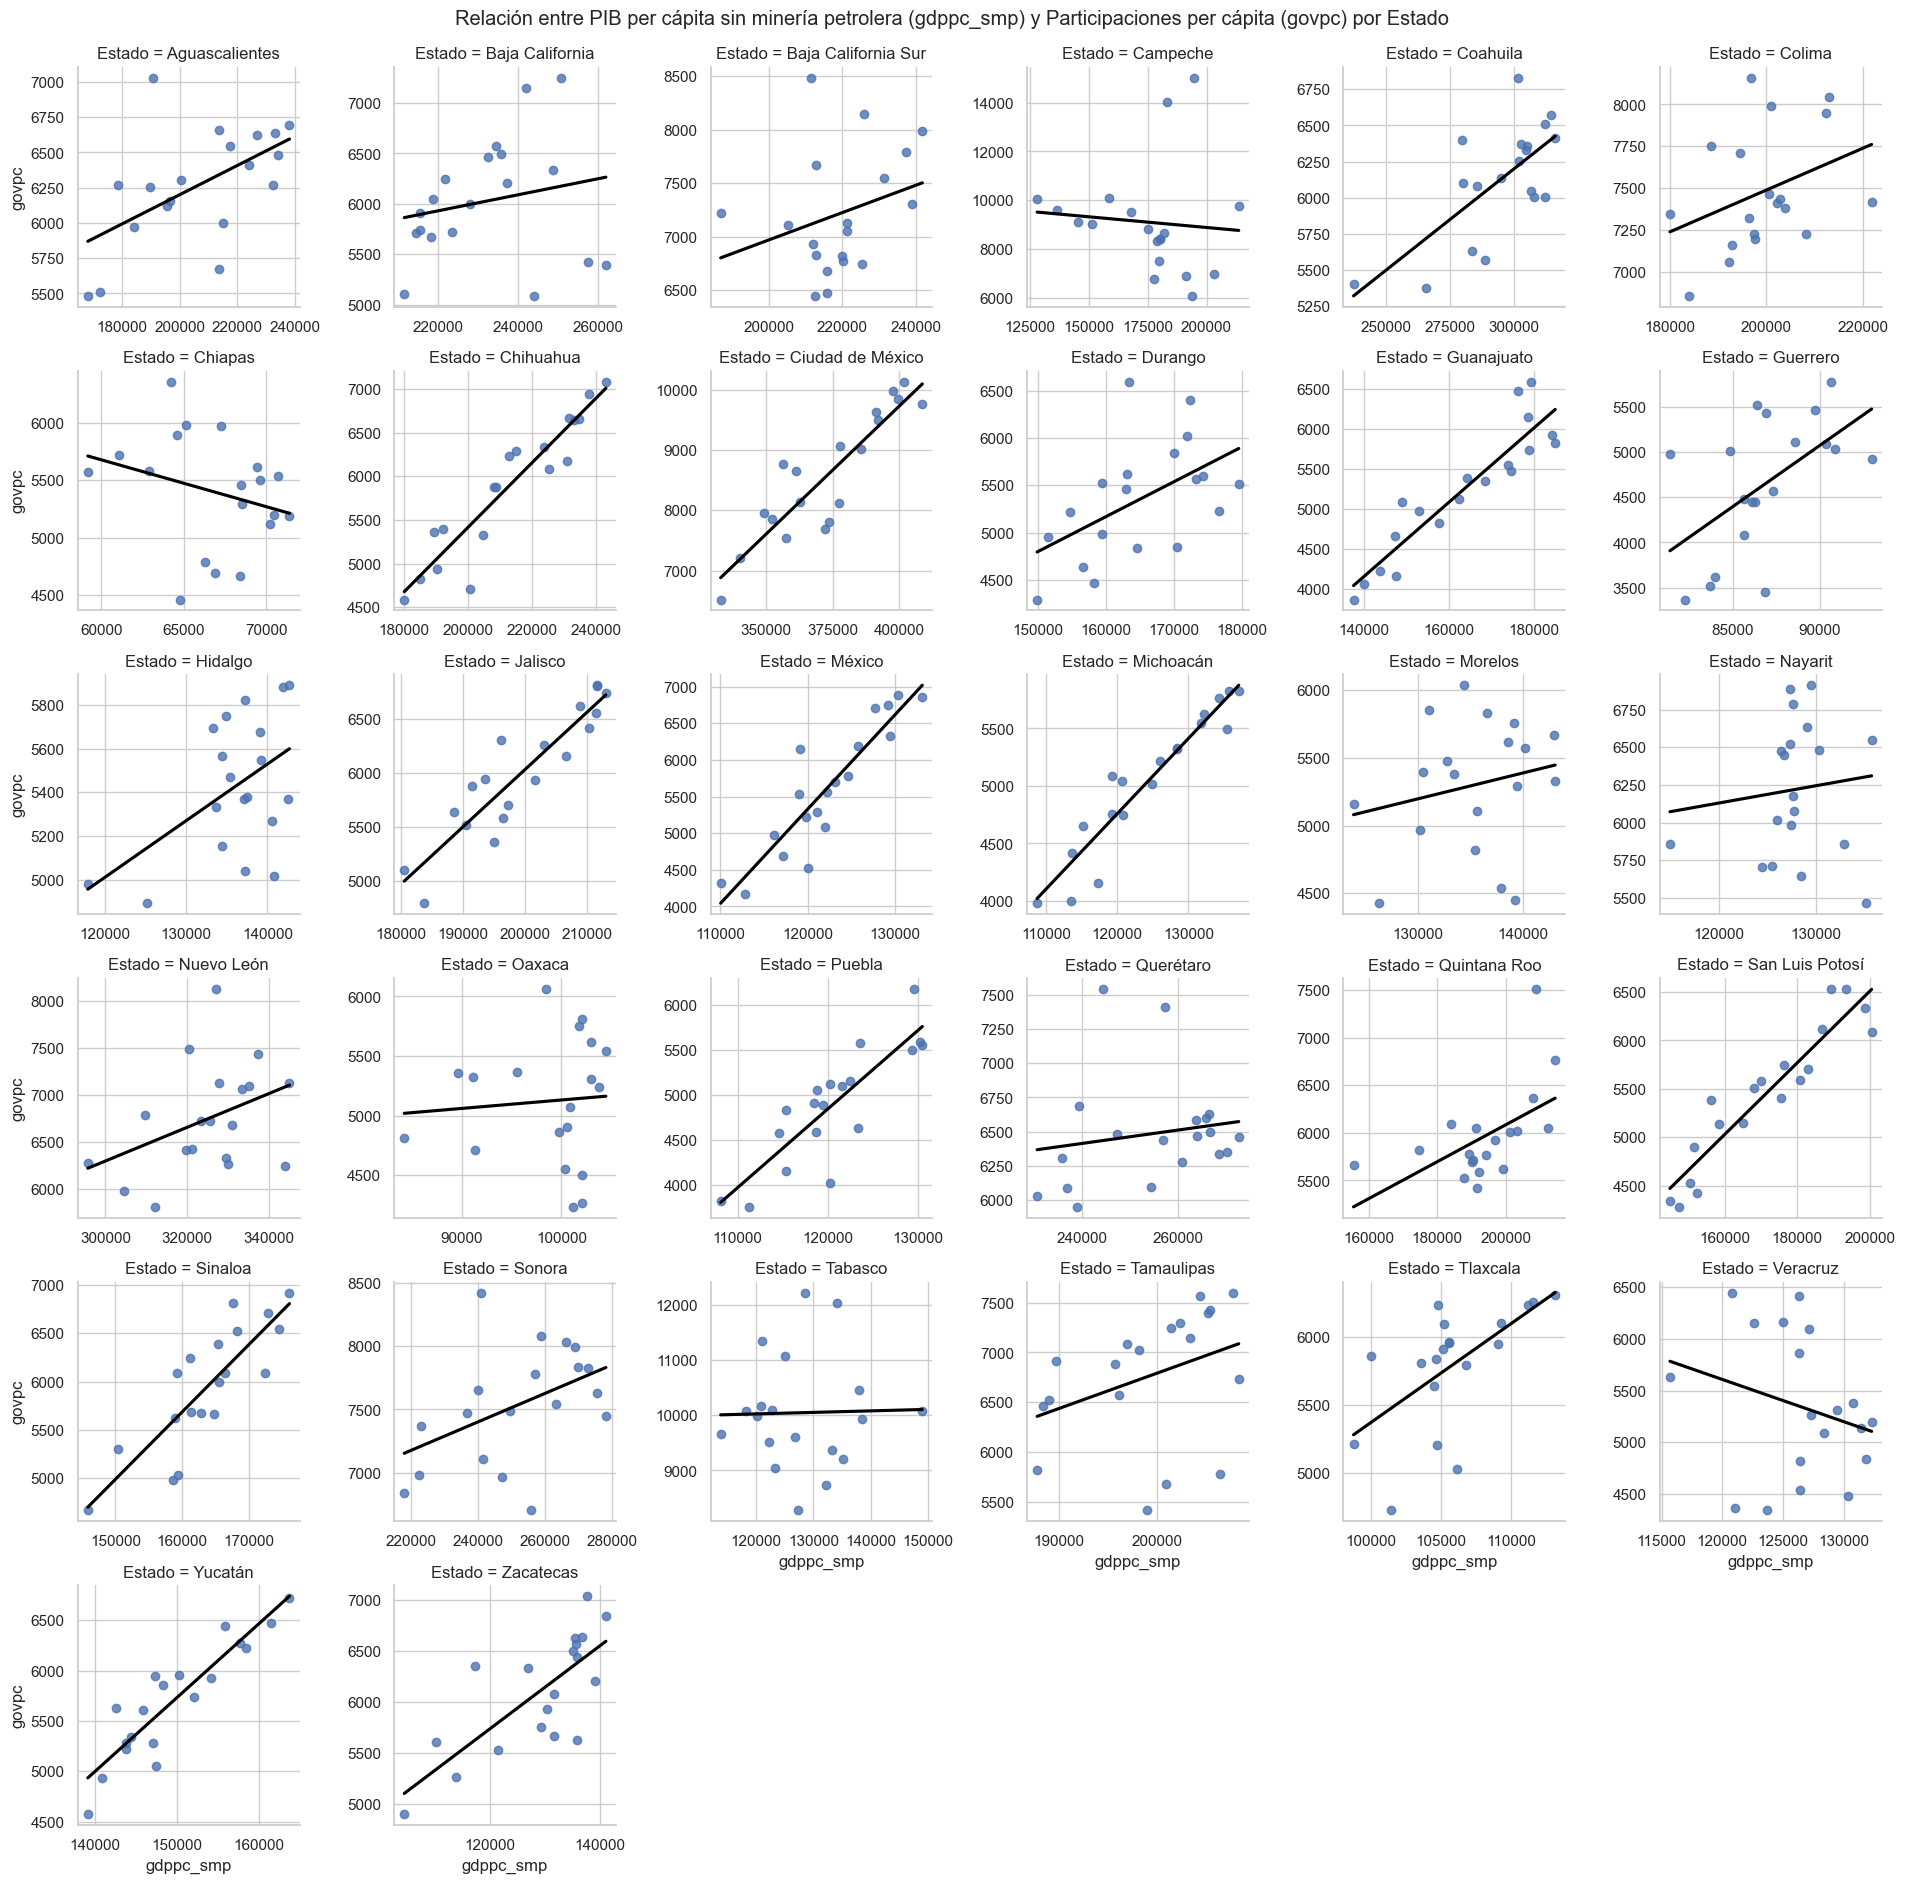

In [126]:
# Relación entre govpc y gdppc por Estado (relplot)
sns.lmplot(data=df, x='gdppc_smp', y='govpc', col='Estado', col_wrap=6, height=3.2,   
            line_kws={'color': 'black'}, ci=None, facet_kws = {'sharex':False, 'sharey':False})
plt.subplots_adjust(top=0.95)
plt.suptitle('Relación entre PIB per cápita sin minería petrolera (gdppc_smp) y Participaciones per cápita (govpc) por Estado')
plt.show()

In [127]:
# Dummy para identificar estados petroleros
df['petrolero'] = df['gdp_mp'] > 0

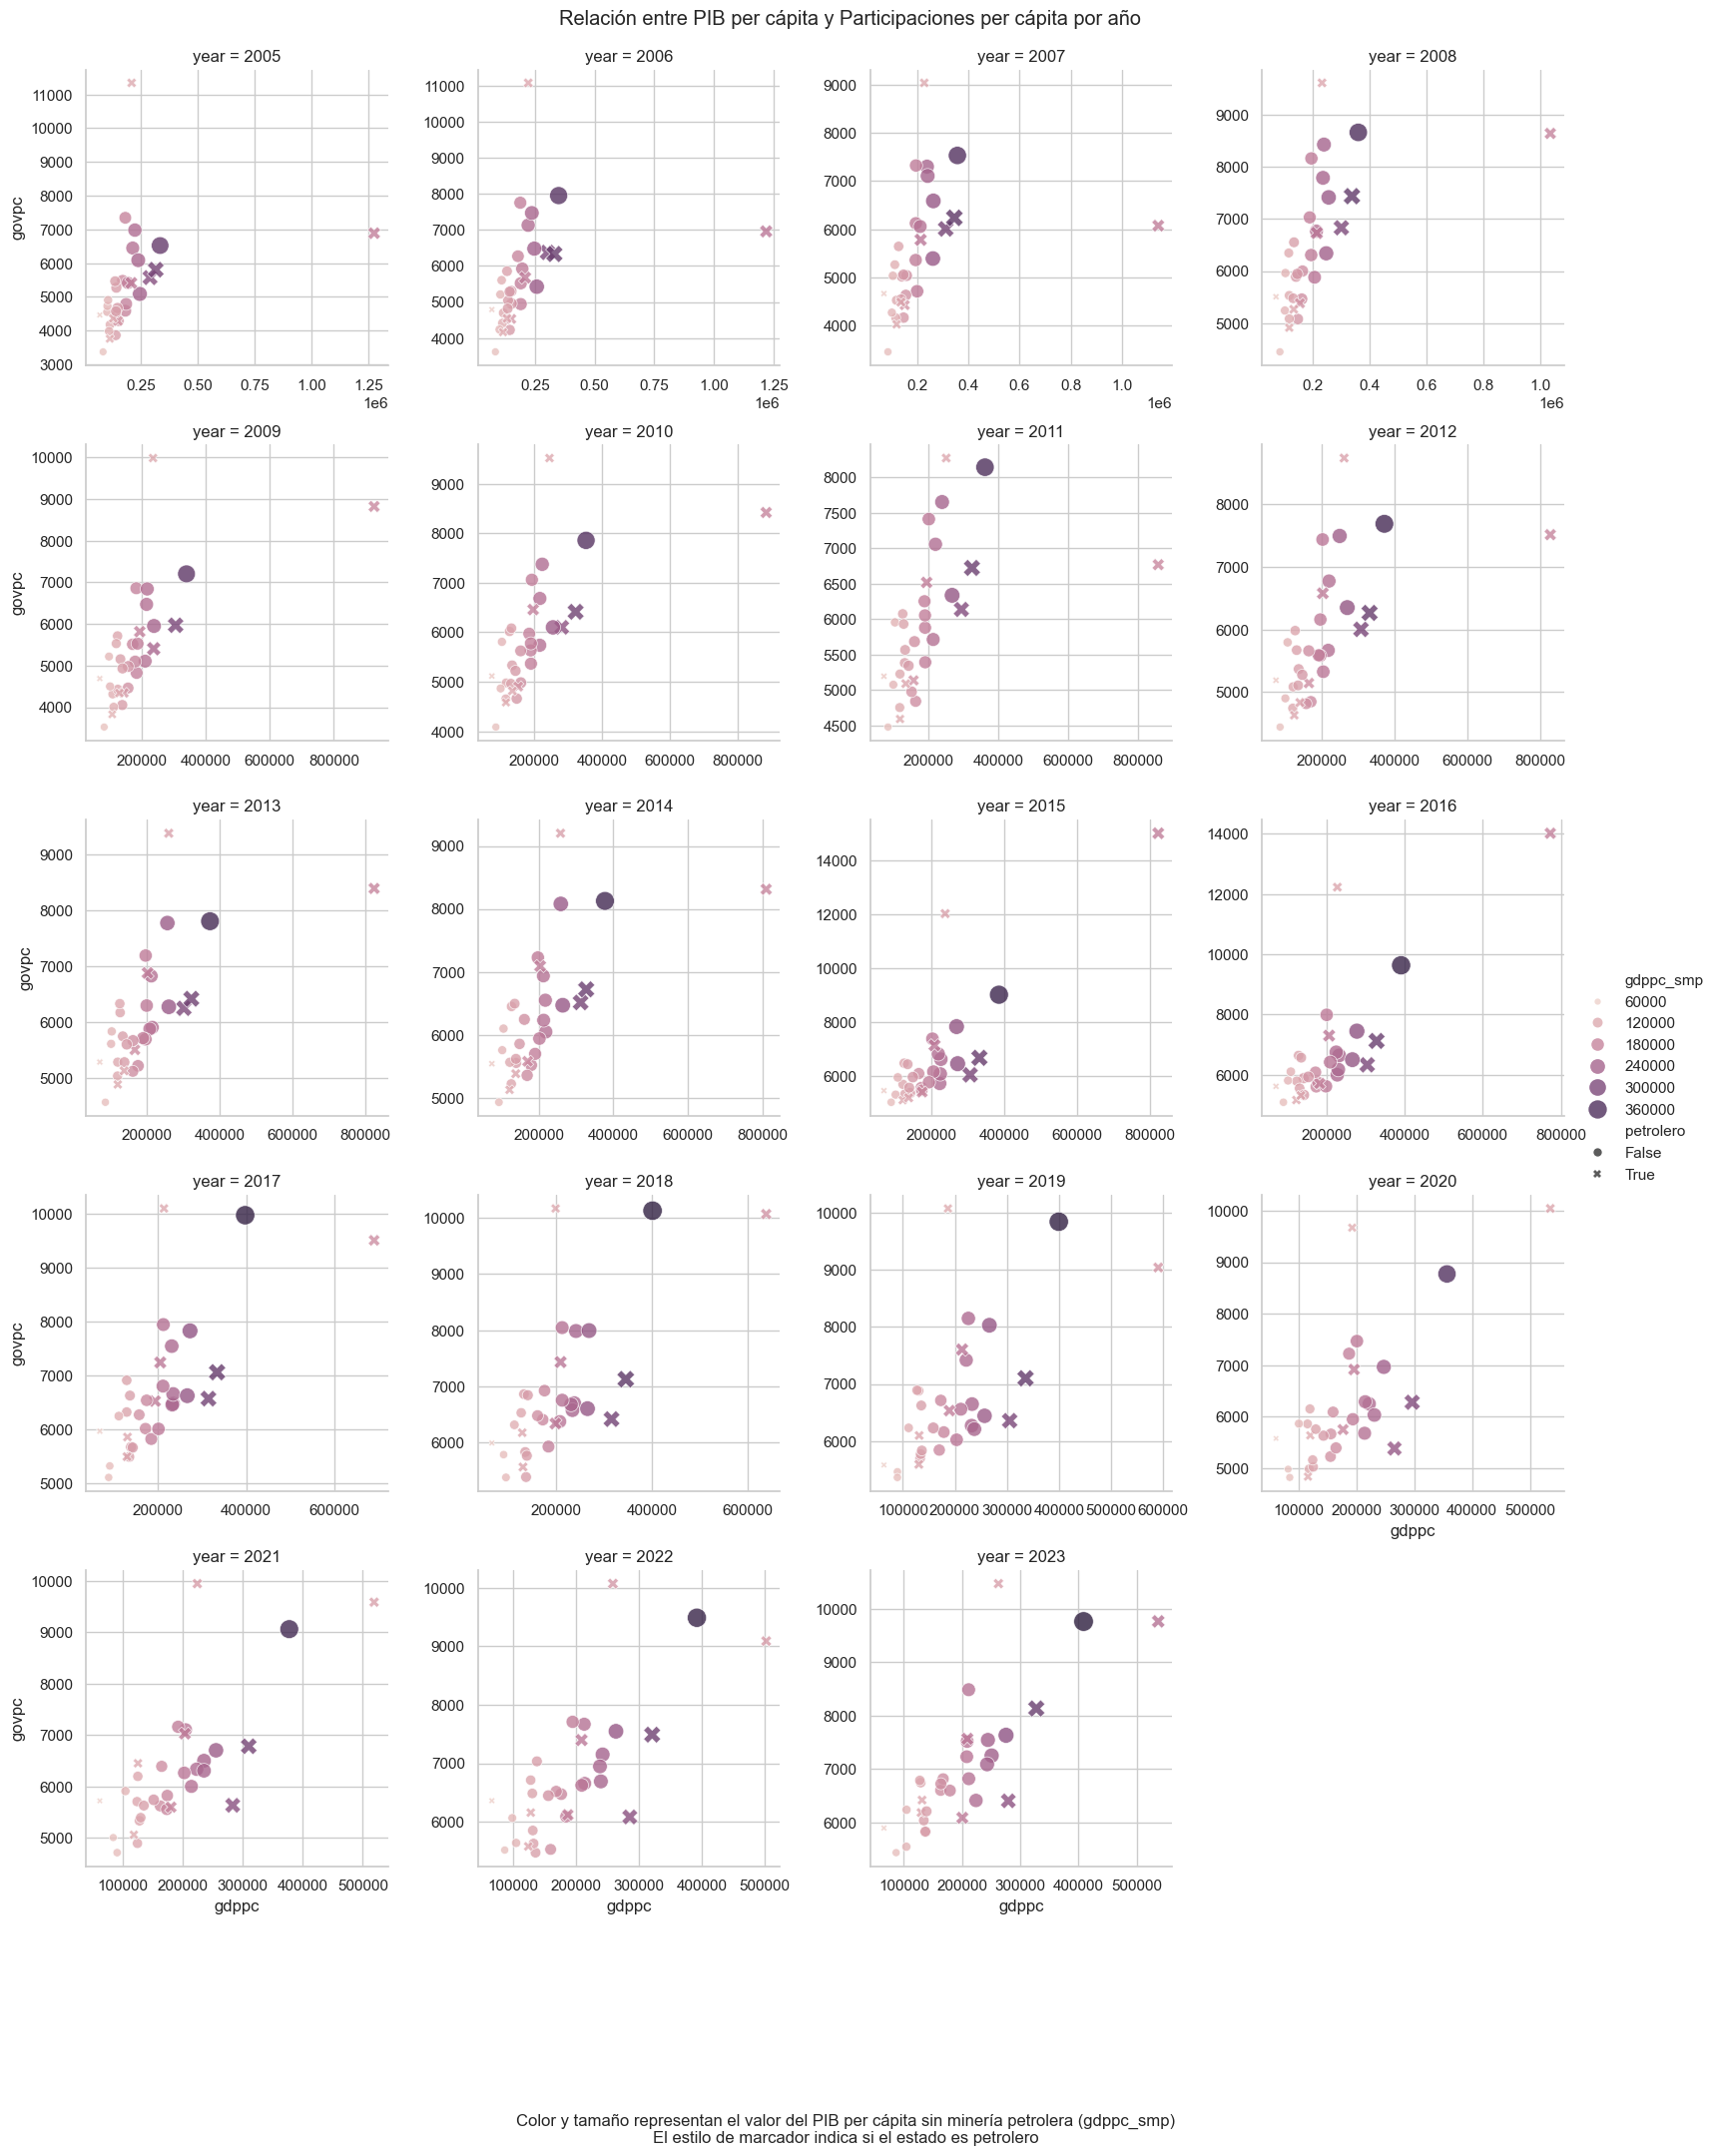

In [128]:
g = sns.relplot(
    data=df,
    x='gdppc',
    y='govpc',
    hue='gdppc_smp',
    size='gdppc_smp',
    style='petrolero',
    sizes=(20, 200),
    col='year',
    col_wrap=4,
    kind='scatter',
    height=4,
    alpha=0.8,
    facet_kws={'sharex': False, 'sharey': False}
)

plt.suptitle('Relación entre PIB per cápita y Participaciones per cápita por año')
plt.subplots_adjust(top=0.95, bottom=0.05)
plt.text(
    0.5, 1,
    'Color y tamaño representan el valor del PIB per cápita sin minería petrolera (gdppc_smp)\n'
    'El estilo de marcador indica si el estado es petrolero',
    ha='center'
)

plt.show()

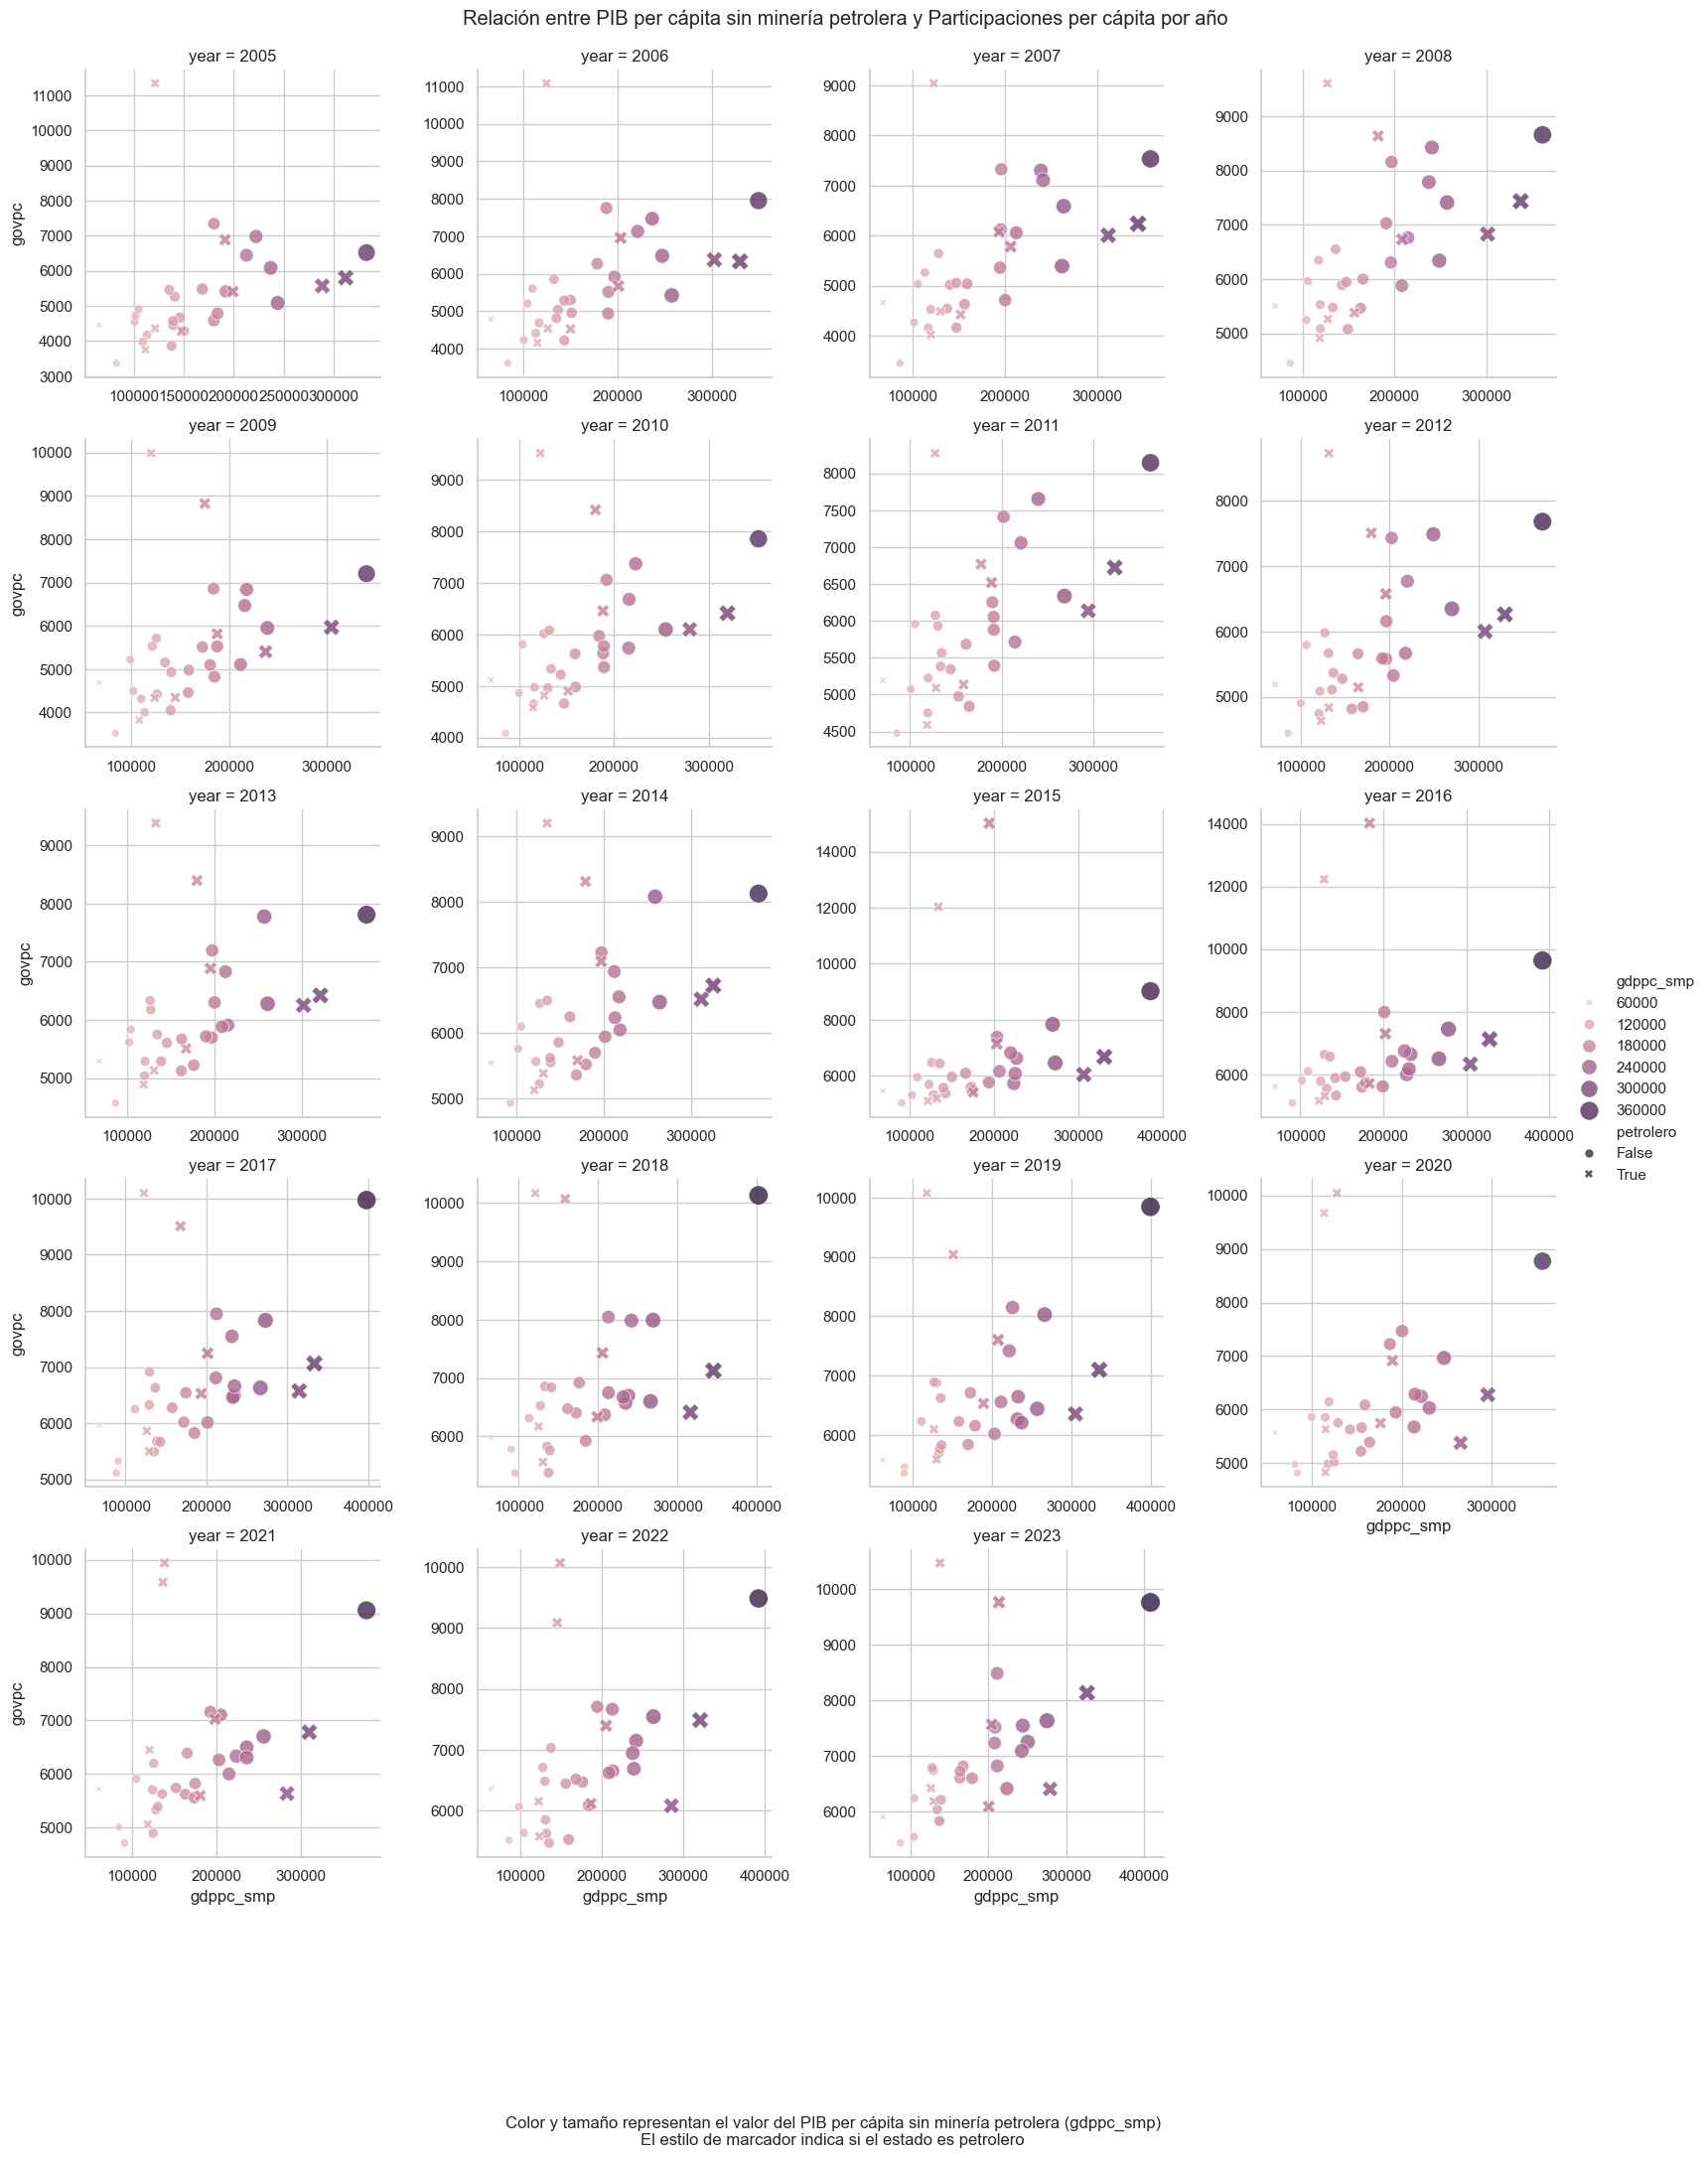

In [129]:
g = sns.relplot(
    data=df,
    x='gdppc_smp',
    y='govpc',
    hue='gdppc_smp',
    size='gdppc_smp',
    style='petrolero',
    sizes=(20, 200),
    col='year',
    col_wrap=4,
    kind='scatter',
    height=4,
    alpha=0.8,
    facet_kws={'sharex': False, 'sharey': False}
)

plt.suptitle('Relación entre PIB per cápita sin minería petrolera y Participaciones per cápita por año')
plt.subplots_adjust(top=0.95, bottom=0.05)
plt.text(
    0.5, 1,
    'Color y tamaño representan el valor del PIB per cápita sin minería petrolera (gdppc_smp)\n'
    'El estilo de marcador indica si el estado es petrolero',
    ha='center'
)

plt.show()

In [130]:
# Regresión simple: govpc ~ gdppc
X1 = sm.add_constant(df['gdppc'])
y = df['govpc']
model_gdppc = sm.OLS(y, X1).fit()

# Regresión con errores estándar robustos (HC3)
robust_gdppc = model_gdppc.get_robustcov_results(cov_type='HC3')

robust_gdppc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  govpc   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     27.80
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           1.87e-07
Time:                        11:07:50   Log-Likelihood:                -5161.9
No. Observations:                 608   AIC:                         1.033e+04
Df Residuals:                     606   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5088.4440    195.399     26.041      0.000    4704.703    5472.185
gdppc          0.0056      0.001      5.273      0.000       0.004       0.008
==============================================================================
Omnibus:                      148.019   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.423
Skew:                           0.944   Prob(JB):                    1.31e-185
Kurtosis:                       8.481   Cond. No.                     4.32e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 4.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
# Regresión simple: govpc ~ gdppc_smp
X2 = sm.add_constant(df['gdppc_smp'])
model_gdppc_smp = sm.OLS(y, X2).fit()

# Regresión con errores estándar robustos (HC3)
robust_gdppc_smp = model_gdppc_smp.get_robustcov_results(cov_type='HC3')

robust_gdppc_smp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  govpc   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           4.52e-34
Time:                        11:07:50   Log-Likelihood:                -5209.7
No. Observations:                 608   AIC:                         1.042e+04
Df Residuals:                     606   BIC:                         1.043e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4716.1337    136.811     34.472      0.000    4447.453    4984.815
gdppc_smp      0.0085      0.001     12.958      0.000       0.007       0.010
==============================================================================
Omnibus:                      341.932   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2787.021
Skew:                           2.405   Prob(JB):                         0.00
Kurtosis:                      12.320   Cond. No.                     5.20e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 5.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
from linearmodels import PanelOLS, RandomEffects
from linearmodels.panel.results import compare

# Preparar índice para panel
df_panel = df.set_index(['Estado', 'year'])[['govpc', 'gdppc', 'gdppc_smp']].dropna()

In [133]:
# ----------- Modelo con gdppc -----------

# Fixed Effects (Entity)
fe_gdppc = PanelOLS.from_formula('govpc ~ gdppc + EntityEffects', data=df_panel).fit(cov_type='robust')
print(fe_gdppc.summary)

# Random Effects
re_gdppc = RandomEffects.from_formula('govpc ~ gdppc', data=df_panel).fit(cov_type='robust')
print(re_gdppc.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  govpc   R-squared:                        0.0128
Estimator:                   PanelOLS   R-squared (Between):             -0.1344
No. Observations:                 608   R-squared (Within):               0.0128
Date:                Mon, Aug 04 2025   R-squared (Overall):             -0.1326
Time:                        11:07:50   Log-likelihood                   -4852.4
Cov. Estimator:                Robust                                           
                                        F-statistic:                      7.4677
Entities:                          32   P-value                           0.0065
Avg Obs:                       19.000   Distribution:                   F(1,575)
Min Obs:                       19.000                                           
Max Obs:                       19.000   F-statistic (robust):             2.7010
                            

In [134]:
# ----------- Modelo con gdppc_smp -----------

# Fixed Effects (Entity)
fe_smp = PanelOLS.from_formula('govpc ~ gdppc_smp + EntityEffects', data=df_panel).fit(cov_type='robust')
print(fe_smp.summary)

# Random Effects
re_smp = RandomEffects.from_formula('govpc ~ gdppc_smp', data=df_panel).fit(cov_type='robust')
print(re_smp.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  govpc   R-squared:                        0.1664
Estimator:                   PanelOLS   R-squared (Between):              0.8410
No. Observations:                 608   R-squared (Within):               0.1664
Date:                Mon, Aug 04 2025   R-squared (Overall):              0.8326
Time:                        11:07:50   Log-likelihood                   -4801.0
Cov. Estimator:                Robust                                           
                                        F-statistic:                      114.78
Entities:                          32   P-value                           0.0000
Avg Obs:                       19.000   Distribution:                   F(1,575)
Min Obs:                       19.000                                           
Max Obs:                       19.000   F-statistic (robust):             71.457
                            